In [ ]:
import pandas as pd

# 목차
- 데이터 로드
- 전처리
- tokenize (lemmatize)
- topic modeling, keyword extraction
- sentiment analysis

# 영어 자연어 처리

## 1. 데이터 로드
- imdb 데이터 출처 : https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews


In [ ]:
imdb_df = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Data Mining/dm-text-analysis/imdb_movie_review.csv',encoding='utf-8')
imdb_df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
len(imdb_df)

3000

In [ ]:
imdb_df.review.iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
imdb_df.sentiment.value_counts()

positive    1508
negative    1492
Name: sentiment, dtype: int64

## 2. 전처리

In [ ]:
! pip install contractions
import re
import contractions

     |████████████████████████████████| 286kB 6.8MB/s 
     |████████████████████████████████| 327kB 10.7MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85395 sha256=e998b2567dd70fab9e0189eec49ebc3a48b5a86c1292c0af260fce20d8f7d8f6
  Stored in directory: /root/.cache/pip/wheels/3a/03/34/77e3ece0bba8b86bfac88a79f923b36d805cad63caeba38842
Successfully built pyahocorasick


In [ ]:
def text_clean(text):
    
    text = contractions.fix(text) #he's -> he is
    text = re.sub('<br />'," ",text)  
    text = re.sub('https?:/\/\S+', ' ', text) # remove urls
    text = re.sub('[0-9]+', ' ', text) # remove numbers
    text = re.sub('[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\…》]+', ' ', text) # remove all symbols and punctuation except for . , ! and ?
    text = re.sub("'"," ", text)
    text = re.sub('\s+', ' ', text) # 중복 띄어쓰기 삭제

    text = text.lower() # 소문자
    return text.strip()

In [ ]:
text_clean(imdb_df.review.iloc[1])

'a wonderful little production the filming technique is very unassuming very old time bbc fashion and gives a comforting and sometimes discomforting sense of realism to the entire piece the actors are extremely well chosen michael sheen not only has got all the polari but he has all the voices down pat too you can truly see the seamless editing guided by the references to williams diary entries not only is it well worth the watching but it is a terrificly written and performed piece a masterful production about one of the great master s of comedy and his life the realism really comes home with the little things the fantasy of the guard which rather than use the traditional dream techniques remains solid then disappears it plays on our knowledge and our senses particularly with the scenes concerning orton and halliwell and the sets particularly of their flat with halliwell s murals decorating every surface are terribly well done'

## 3. lemmatize
- nltk wordnetlemmatizer (어근 찾기?)
- spacy

In [ ]:
import nltk
nltk.download('all')
from nltk.corpus import names
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
WordNetLemmatizer().lemmatize(imdb_df.review.iloc[1].split()[9], pos='v') #공백 단위로 나눠짐 v는 동사 pos로.. pos 없으면 is 나옴

'be'

In [ ]:
import spacy
import en_core_web_sm
from spacy.lang.en import English
from tqdm import tqdm

# https://spacy.io/usage

In [ ]:
nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner']) #en_core_web_sm : version(small)
spacy_stopwords=spacy.lang.en.stop_words.STOP_WORDS

In [ ]:
imdb_df.review.iloc[1]

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [ ]:
temp = nlp(imdb_df.review.iloc[1])
temp #걍 똑같이 나옴

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.

In [ ]:
temp[2] #토큰나이징이 있어서 w가 아닌 little이 나옴

little

In [ ]:
temp[11].lemma_

'be'

In [ ]:
def spacy_lemma(sentence):
    text = text_clean(sentence)
    text=nlp(text)
    temp=[token.lemma_ for token in text if token.lemma_ not in ['-PRON-'] + list(spacy_stopwords)] #pron 대명사
    
    return " ".join(temp)

In [ ]:
imdb_df['body'] = imdb_df.review.apply(lambda x: spacy_lemma(x))

In [ ]:
imdb_df['body'] #it's me

0       reviewer mention watch oz episode hook right e...
1       wonderful little production filming technique ...
2       think wonderful way spend time hot summer week...
3       basically family little boy jake think zombie ...
4       petter mattei s love time money visually stunn...
                              ...                        
2995    experience head need understand monkee film se...
2996    fan judy garland vincente minnelli gene kelly ...
2997    mr harvey light candle anchor brilliant perfor...
2998    della myers kim basinger upper class housewife...
2999    hire movie expect laugh hopefully amused sorel...
Name: body, Length: 3000, dtype: object

# 4. Topic Modeling 문서 전체에서 토픽을 뽑아냄
  - LDA  : https://wikidocs.net/30708

In [ ]:
imdb_df = pd.read_csv('/content/drive/MyDrive/skku/2021-1 Data Mining/dm-text-analysis/imdb_preprocess.csv',encoding='utf-8')
imdb_df.head()

,Unnamed: 0,review,sentiment,body
0,0,One of the other reviewers has mentioned that ...,positive,reviewer mention watch oz episode hook right e...
1,1,A wonderful little production. <br /><br />The...,positive,wonderful little production filming technique ...
2,2,I thought this was a wonderful way to spend ti...,positive,think wonderful way spend time hot summer week...
3,3,Basically there's a family where a little boy ...,negative,basically family little boy jake think zombie ...
4,4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,petter mattei s love time money visually stunn...


In [ ]:
# Gensim
import gensim
import gensim.corpora as corpora

In [ ]:
new_token = [x.split() for x in imdb_df.body]
len(new_token)

3000

In [ ]:
new_token[0]

['reviewer',
 'mention',
 'watch',
 'oz',
 'episode',
 'hook',
 'right',
 'exactly',
 'happen',
 'thing',
 'strike',
 'oz',
 'brutality',
 'unflinche',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'trust',
 'faint',
 'hearted',
 'timid',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'word',
 'oz',
 'nickname',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'face',
 'inward',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'aryan',
 'muslims',
 'gangstas',
 'latinos',
 'christians',
 'italian',
 'irish',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'far',
 'away',
 'main',
 'appeal',
 'fact',
 'dare',
 'forget',
 'pretty',
 'picture',
 'paint',
 'mainstream',
 'audience',
 'forget',
 'charm',
 'forget',
 'romance',
 'oz',
 'mess',
 'episode',
 'strike',
 'nasty',
 'surreal',
 'ready

In [ ]:
dictionary = corpora.Dictionary(new_token)
corpus = [dictionary.doc2bow(texts) for texts in new_token] 

In [ ]:
corpus[0] # id, frequency

[(0, 1),
 (1, 1),
 (2, 1),
 (3, 1),
 (4, 1),
 (5, 1),
 (6, 2),
 (7, 1),
 (8, 1),
 (9, 1),
 (10, 1),
 (11, 1),
 (12, 2),
 (13, 1),
 (14, 1),
 (15, 1),
 (16, 1),
 (17, 1),
 (18, 1),
 (19, 1),
 (20, 1),
 (21, 1),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 1),
 (30, 1),
 (31, 1),
 (32, 1),
 (33, 1),
 (34, 3),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 1),
 (39, 1),
 (40, 1),
 (41, 1),
 (42, 2),
 (43, 1),
 (44, 1),
 (45, 1),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 1),
 (51, 1),
 (52, 1),
 (53, 1),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 1),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 6),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 3),
 (74, 1),
 (75, 1),
 (76, 1),
 (77, 1),
 (78, 1),
 (79, 1),
 (80, 2),
 (81, 1),
 (82, 1),
 (83, 1),
 (84, 1),
 (85, 1),
 (86, 1),
 (87, 1),
 (88, 1),
 (89, 1),
 (90, 1),
 (91, 1),
 (92, 1),
 (93, 1),
 (94, 2),
 (95, 1),
 (96, 1),
 (97, 1),
 (98, 1),
 (99, 1),
 (100, 1),

In [ ]:
len(dictionary)

24621

In [ ]:
print(dictionary[66])

order


In [ ]:
lda_model_result = gensim.models.ldamodel.LdaModel(corpus=corpus, # tuple형태의 딕셔너리
                                           id2word=dictionary,
                                           num_topics=10, #토픽은 10개
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [ ]:
topics = lda_model_result.print_topics(num_words=5) #토픽 당 5개의 단어를 뽑음
topics

[(0,
  '0.014*"\x96" + 0.009*"match" + 0.008*"john" + 0.007*"bond" + 0.006*"villain"'),
 (1,
  '0.014*"s" + 0.012*"john" + 0.009*"musical" + 0.008*"play" + 0.008*"role"'),
 (2,
  '0.017*"s" + 0.008*"perfect" + 0.007*"wonderful" + 0.006*"particularly" + 0.005*"decent"'),
 (3, '0.037*"s" + 0.015*"film" + 0.014*"life" + 0.011*"man" + 0.011*"woman"'),
 (4,
  '0.039*"movie" + 0.035*"film" + 0.017*"like" + 0.016*"good" + 0.013*"time"'),
 (5,
  '0.021*"war" + 0.010*"world" + 0.008*"french" + 0.007*"cartoon" + 0.007*"art"'),
 (6,
  '0.015*"game" + 0.008*"king" + 0.007*"certain" + 0.006*"positive" + 0.006*"superb"'),
 (7,
  '0.010*"book" + 0.007*"alien" + 0.007*"novel" + 0.007*"grow" + 0.005*"s"'),
 (8,
  '0.016*"series" + 0.015*"action" + 0.014*"money" + 0.012*"episode" + 0.009*"video"'),
 (9,
  '0.012*"wife" + 0.011*"daughter" + 0.010*"pay" + 0.010*"husband" + 0.010*"sister"')]

# 5. Keyword Extraction 포스트(문장) 단위로 주 키워드가 뭔지
  - KeyBERT : https://github.com/MaartenGr/KeyBERT 
  - gensim keyword extraction

In [ ]:
! pip install keybert
from keybert import KeyBERT
kw_extractor = KeyBERT('distilbert-base-nli-mean-tokens')

In [ ]:
keyword = kw_extractor.extract_keywords(imdb_df.body.iloc[1],stop_words='english', min_df=2, top_n = 10, keyphrase_ngram_range=(1,1))
keyword #최소 두 번이상 나온 단어, 10개, (1,1) 단어 하나, (1,2) 단어 두개까지

[('diary', 0.225),
 ('comedy', 0.2242),
 ('actor', 0.2217),
 ('orton', 0.2127),
 ('dream', 0.1946),
 ('masterful', 0.1688),
 ('fantasy', 0.1633),
 ('halliwell', 0.1632),
 ('realism', 0.1587),
 ('home', 0.1547)]

In [ ]:
def extract_keybert(sentence):
  keyword = kw_extractor.extract_keywords(sentence,stop_words='english', min_df=2, top_n = 5, keyphrase_ngram_range=(1,1))
  keyword = [word for word,scroe in keyword ]
  return keyword

In [ ]:
imdb_df['keyword'] = imdb_df.body.apply(lambda x : extract_keybert(x))

In [ ]:
imdb_df['keyword']

0        [gangstas, prison, latinos, hardcore, italian]
1                  [diary, comedy, actor, orton, dream]
2             [comedy, superman, weekend, summer, sexy]
3          [zombie, divorce, boogeyman, kill, thriller]
4         [luxurious, stylishly, movie, love, talented]
                             ...                       
2995                [actor, idol, trap, monkee, trippy]
2996              [clown, dance, movie, paris, musical]
2997    [teacher, christmas, bullies, rapping, muslims]
2998    [housewife, batman, mall, condominium, husband]
2999             [pathetic, shame, joke, cringe, movie]
Name: keyword, Length: 3000, dtype: object

In [ ]:
from gensim.summarization import keywords #조교님은 gensim이 좀 더 좋은 것 같다 둘다 좋다 나한테 잘 맞는걸로 쓰기

In [ ]:
keyword = keywords(imdb_df.body.iloc[1]).split('\n')
keyword

['technique',
 'sense realism',
 'little production',
 'piece',
 'particularly',
 'decorate surface',
 'halliwell',
 'masterful',
 'master',
 'seamless editing']

In [ ]:
imdb_df.body.iloc[1]

'wonderful little production filming technique unassume old time bbc fashion comforting discomforte sense realism entire piece actor extremely choose michael sheen polari voice pat truly seamless editing guide reference williams diary entrie worth watching terrificly write perform piece masterful production great master s comedy life realism come home little thing fantasy guard use traditional dream technique remain solid disappear play knowledge sense particularly scene concern orton halliwell set particularly flat halliwell s mural decorate surface terribly'

In [ ]:
def gensim_keyword(sentence):
  keyword = keywords(sentence).split('\n')
  return keyword

In [ ]:
imdb_df['g_keyword'] = imdb_df.body.apply(lambda x : gensim_keyword(x))
imdb_df.to_csv('imdb_keyword.csv', index=False, encoding='utf-8')

KeyboardInterrupt: ignored

# 5. wordcloud

In [ ]:
from collections import Counter
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [ ]:
imdb_df = pd.read_csv('imdb_keyword.csv', encoding='utf-8')
imdb_df.head()

FileNotFoundError: ignored

In [ ]:
from ast import literal_eval
imdb_df['keyword'] = imdb_df.keyword.apply(lambda x: literal_eval(str(x)))

In [ ]:
imdb_df['keyword'].iloc[0] #keyword만 했음 실습은

['gangstas', 'prison', 'latinos', 'hardcore', 'italian']

In [ ]:
p_keyword = imdb_df[imdb_df.sentiment == 'positive'].keyword 
p_keyword = [word for words in p_keyword for word in words]

n_keyword = imdb_df[imdb_df.sentiment == 'negative'].keyword 
n_keyword = [word for words in n_keyword for word in words]

In [ ]:
len(p_keyword), len(n_keyword)

(7540, 7460)

In [ ]:
p_keyword[:5]

['gangstas', 'prison', 'latinos', 'hardcore', 'italian']

In [ ]:
p_count = Counter(p_keyword)
n_count = Counter(n_keyword)

In [ ]:
print(p_count.most_common(n=10))
print(n_count.most_common(n=10))

[('movie', 538), ('film', 180), ('comedy', 120), ('dvd', 114), ('love', 93), ('hollywood', 92), ('actor', 83), ('favorite', 78), ('murder', 77), ('wife', 47)]
[('movie', 565), ('film', 172), ('actor', 92), ('bad', 81), ('comedy', 79), ('murder', 78), ('hollywood', 77), ('dvd', 64), ('awful', 60), ('horror', 60)]


In [ ]:
p_only_count = p_count - n_count #중복되는 건 빼기
n_only_count = n_count - p_count

In [ ]:
print(p_only_count.most_common(n=10))
print(n_only_count.most_common(n=10))

[('love', 88), ('favorite', 65), ('dvd', 50), ('comedy', 41), ('laugh', 32), ('oscar', 25), ('funny', 24), ('soundtrack', 22), ('genius', 21), ('sister', 21)]
[('bad', 78), ('awful', 59), ('horrible', 49), ('horror', 39), ('monster', 37), ('terrible', 35), ('kill', 31), ('boring', 28), ('movie', 27), ('zombie', 24)]


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


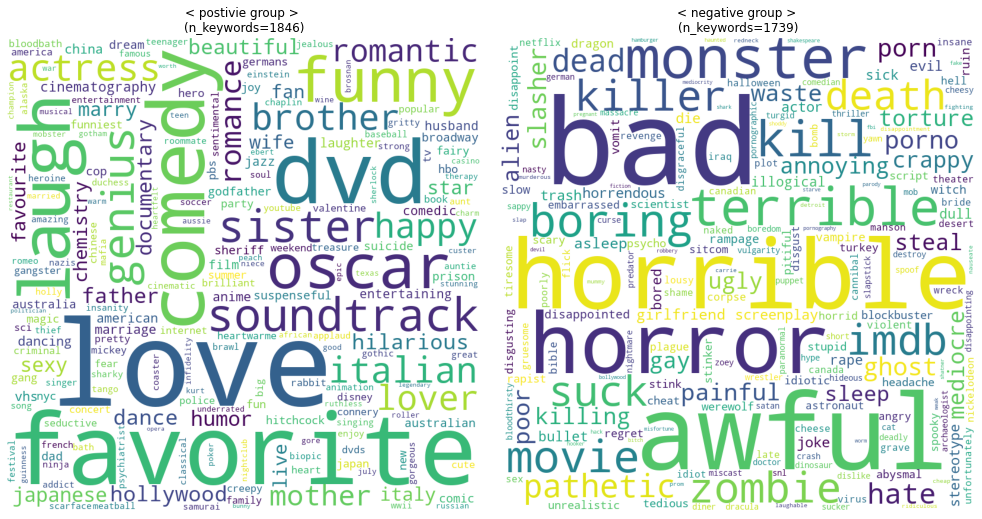

In [ ]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

p_wordcloud = WordCloud(max_font_size=200, background_color='white', width=800, height=800, stopwords=STOPWORDS)
p_wordcloud.generate_from_frequencies(p_only_count)

n_wordcloud = WordCloud(max_font_size=200, background_color='white', width=800, height=800, stopwords=STOPWORDS)
n_wordcloud.generate_from_frequencies(n_only_count)

plt.figure(figsize=(14,8))
plt.subplot(1,2,1)
plt.imshow(p_wordcloud)
plt.title(f'< postivie group > \n(n_keywords={len(p_only_count.items())})')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(n_wordcloud)
plt.title(f'< negative group > \n(n_keywords={len(n_only_count.items())})')
plt.axis('off')

plt.tight_layout(pad=2)

plt.show()

In [ ]:
# 생성된 WordCloud를 test.jpg로 보낸다.
p_wordcloud.to_file('p_wordcloud.jpg')
n_wordcloud.to_file('n_wordcloud.jpg')

# 6. sentiment analysis
- 참고 : https://statkclee.github.io/nlp2/nlp-sentiment.html

In [ ]:
# import nltk
# nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

def vader_polarity(text):
  """ Transform the output to a binary 0/1 result """
  score = analyser.polarity_scores(text)
  return 1 if score['pos'] > score['neg'] else 0

for index, (text, sentiment) in enumerate(zip(imdb_df.iloc[:4].body, imdb_df.iloc[:4].sentiment)):

  print(f'Text {index} : {text.strip()}')
  print('Sentiment:', sentiment)
  print('Predicted Sentiment polarity:', analyser.polarity_scores(text))
  print('Predicted Sentiment polarity Class:', vader_polarity(text))
  print('-'*60)

Text 0 : reviewer mention watch oz episode hook right exactly happen thing strike oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word oz nickname oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inward privacy high agenda city home aryan muslims gangstas latinos christians italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode strike nasty surreal ready watch develop taste oz accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannere middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable view touch dark
Sentiment: positive
Predicted Sentiment polarity: {'neg': 0.36, 'neu': 0.515, 'pos': 0.125, 'comp

In [ ]:
from nltk.corpus import sentiwordnet as swn #좀 더 좋은 듯
breakdown = swn.senti_synset('breakdown.n.03') #단어.형태소.몇번째 뜻
print(breakdown)

<breakdown.n.03: PosScore=0.0 NegScore=0.25>


In [ ]:
# import nltk
# nltk.download('wordnet')
# nltk.download('sentiwordnet')
    
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk import sent_tokenize, word_tokenize, pos_tag
 
lemmatizer = WordNetLemmatizer()
 
def penn_to_wn(tag):
    """
    Convert between the PennTreebank tags to simple Wordnet tags
    """
    if tag.startswith('J'):
        return wn.ADJ
    elif tag.startswith('N'):
        return wn.NOUN
    elif tag.startswith('R'):
        return wn.ADV
    elif tag.startswith('V'):
        return wn.VERB
    return None
 
def swn_polarity(text):
    """
    Return a sentiment polarity: 0 = negative, 1 = positive
    """
    sentiment = 0.0
    tokens_count = 0
 
    raw_sentences = sent_tokenize(text)
    for raw_sentence in raw_sentences:
        tagged_sentence = pos_tag(word_tokenize(raw_sentence)) #어떤 형태소인지 바로 뽑아주고
 
        for word, tag in tagged_sentence:
            wn_tag = penn_to_wn(tag)
            if wn_tag not in (wn.NOUN, wn.ADJ, wn.ADV):
                continue
 
            lemma = lemmatizer.lemmatize(word, pos=wn_tag)
            if not lemma:
                continue
 
            synsets = wn.synsets(lemma, pos=wn_tag)
            if not synsets:
                continue
 
            # Take the first sense, the most common 첫번째 단어로
            synset = synsets[0]
            swn_synset = swn.senti_synset(synset.name())
 
            sentiment += swn_synset.pos_score() - swn_synset.neg_score() #전체 스코어
            tokens_count += 1
    print(synset.name())
    # judgment call ? Default to positive or negative
    if not tokens_count:
        return 0
 
    # sum greater than 0 => positive sentiment
    if sentiment >= 0:
        return sentiment, 1
 
    # negative sentiment
    return sentiment, 0

In [ ]:
 for index, (text, sentiment) in enumerate(zip(imdb_df.iloc[:4].body, imdb_df.iloc[:4].sentiment)):
    print(f'Text {index} : {text.strip()}')
    print('Sentiment:', sentiment)
    print('Predicted Sentiment polarity:', swn_polarity(text))
    print('-'*60)

Text 0 : reviewer mention watch oz episode hook right exactly happen thing strike oz brutality unflinche scene violence set right word trust faint hearted timid pull punch regard drug sex violence hardcore classic use word oz nickname oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass face inward privacy high agenda city home aryan muslims gangstas latinos christians italian irish scuffle death stare dodgy dealing shady agreement far away main appeal fact dare forget pretty picture paint mainstream audience forget charm forget romance oz mess episode strike nasty surreal ready watch develop taste oz accustomed high level graphic violence violence injustice crooked guard sell nickel inmate kill order away mannere middle class inmate turn prison bitch lack street skill prison experience watch oz comfortable uncomfortable view touch dark
Sentiment: positive
dark.n.01
Predicted Sentiment polarity: (-1.0, 0)
---------------------------

# 한국어

In [ ]:
# 한국어 폰트 설정
# https://frhyme.github.io/python-libs/jupyter_install_font_in_colab/

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

!apt-get install fonts-nanum*
!apt-get install fonts-woowa-hanna

BM_HANNA = fm.FontProperties(fname='/usr/share/fonts/truetype/woowa/BM-HANNA.ttf')
NANUM_GOTHIC = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothic.ttf')
NANUM_GOTHIC_CODING = fm.FontProperties(fname='/usr/share/fonts/truetype/nanum/NanumGothicCoding.ttf')

"""
- font의 위치를 가져와서 font properties로 사용할 때는 해당 폰트파일이 어디에 있든 문제가 없지만, 
- font_family(font의 이름과 동일한 의미)를 사용해서 세팅할 때는 matplotlib 내에서 해당 폰트 파일을 가지고 있어야 함. 
- 따라서 아래처럼 빌드 해주는 것이 필요함. 
"""
fm._rebuild()

plt.rc('font', family=NANUM_GOTHIC.get_name() )
plt.rcParams['axes.unicode_minus'] = False

## 1. 데이터 로드 

- 네이버 영화 리뷰 데이터 출처 : https://github.com/lovit/naver_movie_scraper


In [ ]:
# 영화 리뷰 다운로드
# from naver_movie_scraper import scrap_comments

# comment = scrap_comments(134963, limit=100, sleep = 0.8)
# print(len(comment))
# df = pd.DataFrame(comment)
# df.to_csv('naver_lalaland_review.csv', encoding='utf-8', index=False)

In [ ]:
lala_review = pd.read_csv('naver_movie_review.csv',encoding='utf-8')
lala_review.head()

,score,text,idx,user,written_at,agree,disagree
0,10,극장에서 3번이나 봤습니다 그래도 보고싶은 너무나 행복한 영화입니다,12180460,후니뷘(beau****),2017.01.15 17:00,1,1
1,10,꿈의나라로~!!!!,12180563,더리버리(rapp****),2017.01.15 17:16,2,1
2,9,반전과 공감이 있는 로맨스 영화,12180612,조윤경(jykj****),2017.01.15 17:26,2,1
3,8,마지막에 남녀가 만나서 사랑을 이뤘으면 행복한 결말이였지만 그렇지 못해서 더 애잔함...,12180615,상하(shtb****),2017.01.15 17:27,2,0
4,8,영상미는 진짜 깜짝 놀랄정도였다근데 난 개인적으로 여주가 극적으로 성공하는게 너무 ...,12180617,이소의(thdm****),2017.01.15 17:27,2,0


In [ ]:
len(lala_review)

1000

# 2. 전처리

In [ ]:
! pip install soynlp
# https://pypi.org/project/soynlp/
! pip install git+https://github.com/ssut/py-hanspell.git #py-hanspell

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-vkoon94d
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-vkoon94d
  Created wheel for py-hanspell: filename=py_hanspell-1.1-cp37-none-any.whl size=4854 sha256=79a4f407509c362a312fd739445621bb7f209d48746716bc3dbe3807993f4ec0
  Stored in directory: /tmp/pip-ephem-wheel-cache-lclxetva/wheels/0a/25/d1/e5e96476dbb1c318cc26c992dd493394fe42b0c204b3e65588
Successfully built py-hanspell


In [ ]:
import re
from soynlp.normalizer import repeat_normalize
from soynlp.normalizer import only_hangle_number
from hanspell import spell_checker

def ko_text_clean(text):
    
    text = only_hangle_number(text)
    text = repeat_normalize(text, num_repeats=2)
    spell = spell_checker.check(text)
    text = spell.checked
    text = re.sub('\s+', ' ', text) # 중복 띄어쓰기 삭제

    return text.strip()

In [ ]:
lala_review.text.iloc[1]

'꿈의나라로~!!!!'

In [ ]:
ko_text_clean(lala_review.text.iloc[1]) #맞춤법 교정

'꿈의 나라로'

In [ ]:
lala_review['body'] = lala_review.text.apply(lambda x : ko_text_clean(x))
lala_review.to_csv('naver_preprocess.csv',index=False, encoding='utf-8')

## 3. tokenize, lemmatize

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python-dev #파이썬 버전 맞춰서 
pip install JPype1
pip install konlpy

%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

# https://konlpy-ko.readthedocs.io/ko/v0.4.3/

In [ ]:
from konlpy.tag import Okt
tokenizer = Okt()
print(tokenizer.morphs(lala_review.text.iloc[0]))

['극장', '에서', '3', '번', '이나', '봤습니다', '그래도', '보고싶은', '너무나', '행복한', '영화', '입니다']


In [ ]:
tokenizer.pos(lala_review.text.iloc[0],stem=True) #해도되고 안해도ok

[('극장', 'Noun'),
 ('에서', 'Josa'),
 ('3', 'Number'),
 ('번', 'Noun'),
 ('이나', 'Josa'),
 ('보다', 'Verb'),
 ('그래도', 'Adverb'),
 ('보다', 'Verb'),
 ('너무나', 'Adverb'),
 ('행복하다', 'Adjective'),
 ('영화', 'Noun'),
 ('이다', 'Adjective')]

# 4. keyword extraction
- KR-WordRank : https://github.com/lovit/KR-WordRank

In [ ]:
lala_review = pd.read_csv('naver_preprocess.csv',encoding='utf-8')
lala_review.head()

,score,text,idx,user,written_at,agree,disagree,body
0,10,극장에서 3번이나 봤습니다 그래도 보고싶은 너무나 행복한 영화입니다,12180460,후니뷘(beau****),2017.01.15 17:00,1,1,극장에서 3번이나 봤습니다 그래도 보고 싶은 너무나 행복한 영화입니다
1,10,꿈의나라로~!!!!,12180563,더리버리(rapp****),2017.01.15 17:16,2,1,꿈의 나라로
2,9,반전과 공감이 있는 로맨스 영화,12180612,조윤경(jykj****),2017.01.15 17:26,2,1,반전과 공감이 있는 로맨스 영화
3,8,마지막에 남녀가 만나서 사랑을 이뤘으면 행복한 결말이였지만 그렇지 못해서 더 애잔함...,12180615,상하(shtb****),2017.01.15 17:27,2,0,마지막에 남녀가 만나서 사랑을 이뤘으면 행복한 결말이었지만 그렇지 못해서 더 애잔함...
4,8,영상미는 진짜 깜짝 놀랄정도였다근데 난 개인적으로 여주가 극적으로 성공하는게 너무 ...,12180617,이소의(thdm****),2017.01.15 17:27,2,0,영상미는 진짜 깜짝 놀랄 정도였다 근데 난 개인적으로 여주가 극적으로 성공하는 게 ...


In [ ]:
lala_review = lala_review.dropna() #none인 애들을 drop

In [ ]:
! pip install krwordrank
from krwordrank.word import KRWordRank

In [ ]:
wordrank_extractor = KRWordRank(
    min_count = 5, # 단어의 최소 출현 빈도수 (그래프 생성 시)
    max_length = 10, # 단어의 최대 길이
    verbose = True
    )

beta = 0.85    # PageRank의 decaying factor beta
max_iter = 10

keywords, rank, graph = wordrank_extractor.extract(lala_review.body.tolist(), beta, max_iter) #body .==. text

scan vocabs ... 
num vocabs = 1396
done


In [ ]:
for word, r in sorted(keywords.items(), key=lambda x:x[1], reverse=True)[:30]:
        print('%8s:\t%.4f' % (word, r))

      영화:	30.9933
      너무:	12.3047
      정말:	6.6482
      음악:	5.6561
     마지막:	4.8748
      좋았:	3.8204
      인생:	3.6903
      최고:	3.5388
      좋은:	3.4389
    아름다운:	3.4312
      보고:	3.3783
      노래:	3.2535
      영상:	3.0401
      생각:	2.9775
     뮤지컬:	2.9403
     스토리:	2.8692
      조금:	2.8662
      사랑:	2.7184
      다시:	2.5022
     여운이:	2.4181
      재밌:	2.4055
      꿈을:	2.3701
      지루:	2.2756
      좋아:	2.2635
      있는:	2.2527
      같은:	2.2166
      사람:	2.2099
      보는:	2.1790
      하는:	2.1412
      좋고:	2.1258


# 5. sentiment analysis (과제)

In [ ]:
http://word.snu.ac.kr/kosac/lexicon.php

In [ ]:
pd.read_csv('polarity.csv')

,ngram,freq,COMP,NEG,NEUT,None,POS,max.value,max.prop
0,가*/JKS,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
1,가*/JKS;있/VV,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
2,가*/JKS;있/VV;었/EP,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
3,가*/VV,3,0.0,0.0,0.0,0.0,1.0,POS,1.0
4,가*/VV;ㄴ다*/EF,1,0.0,0.0,0.0,0.0,1.0,POS,1.0
...,...,...,...,...,...,...,...,...,...
16357,힘들/VA;ㄹ/ETM;것/NNB,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16358,힘들/VA;ㄹ/ETM;때/NNG,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16359,힘차/VA,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
16360,힘차/VA;ㄴ/ETM,1,0.0,1.0,0.0,0.0,0.0,NEG,1.0
